### DataSet 1 : EMNIST

In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ✅ Prétraitement : mise à l’échelle (normalisation)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir en tenseur [0, 1]
    transforms.Normalize((0.1307,), (0.3081,))  # Moyenne et std de EMNIST
])

# 📥 Chargement du dataset EMNIST Digits (chiffres uniquement)
train_dataset = datasets.EMNIST(
    root='./data',
    split='digits',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.EMNIST(
    root='./data',
    split='digits',
    train=False,
    download=True,
    transform=transform
)

# ✅ DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"📊 EMNIST train size : {len(train_dataset)}")
print(f"📊 EMNIST test size  : {len(test_dataset)}")


100%|██████████| 562M/562M [00:44<00:00, 12.5MB/s] 


Extracting ./data\EMNIST\raw\gzip.zip to ./data\EMNIST\raw
📊 EMNIST train size : 240000
📊 EMNIST test size  : 40000


### Les donnes de DIDA

### j'ai telecharger et compreser manuellement depuis le siteweb kagel 

In [7]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 🔁 Prétraitement : images en niveaux de gris, resize et normalisation
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # au cas où certaines images seraient RGB
    transforms.Resize((28, 28)),                  # standard MNIST/EMNIST format
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))          # centrage
])

# 📂 Chemin vers ton dataset trié
data_path = "D:/M1/AIDC/Projet_Ai/ProjetAi_trans/DIDA2/DIDA/250000/250000_Final"

# 📥 Chargement du dataset
dida_dataset = datasets.ImageFolder(root=data_path, transform=transform)

# 🧪 Création du DataLoader
dida_loader = DataLoader(dida_dataset, batch_size=64, shuffle=True)

# ✅ Test rapide
images, labels = next(iter(dida_loader))
print(f"Batch images shape : {images.shape}")
print(f"Batch labels       : {labels[:10]}")


Batch images shape : torch.Size([64, 1, 28, 28])
Batch labels       : tensor([3, 2, 1, 0, 5, 1, 2, 4, 0, 6])


### Code 2 avec essaye de diminuer loss (Best Model so far )

d:\M1\AIDC\Projet_Ai\env\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
Epoch 1: 100%|██████████| 3750/3750 [01:52<00:00, 33.33it/s]


[TRAIN] Epoch 1 | Loss: 8230.40 | Accuracy: 0.1907
[TEST] Accuracy: 0.3179


Epoch 2: 100%|██████████| 3750/3750 [01:52<00:00, 33.42it/s]


[TRAIN] Epoch 2 | Loss: 6408.48 | Accuracy: 0.4206
[TEST] Accuracy: 0.6442


Epoch 3: 100%|██████████| 3750/3750 [01:52<00:00, 33.31it/s]


[TRAIN] Epoch 3 | Loss: 4010.26 | Accuracy: 0.8126
[TEST] Accuracy: 0.9297


Epoch 4: 100%|██████████| 3750/3750 [01:52<00:00, 33.33it/s]


[TRAIN] Epoch 4 | Loss: 2912.27 | Accuracy: 0.9405
[TEST] Accuracy: 0.9609


Epoch 5: 100%|██████████| 3750/3750 [01:58<00:00, 31.52it/s]


[TRAIN] Epoch 5 | Loss: 2575.89 | Accuracy: 0.9631
[TEST] Accuracy: 0.9731


Epoch 6: 100%|██████████| 3750/3750 [01:50<00:00, 33.88it/s]


[TRAIN] Epoch 6 | Loss: 2452.85 | Accuracy: 0.9704
[TEST] Accuracy: 0.9744


Epoch 7: 100%|██████████| 3750/3750 [01:52<00:00, 33.36it/s]


[TRAIN] Epoch 7 | Loss: 2437.97 | Accuracy: 0.9715
[TEST] Accuracy: 0.9743


Epoch 8: 100%|██████████| 3750/3750 [01:48<00:00, 34.55it/s]


[TRAIN] Epoch 8 | Loss: 2425.68 | Accuracy: 0.9721
[TEST] Accuracy: 0.9755


Epoch 9: 100%|██████████| 3750/3750 [01:56<00:00, 32.16it/s]


[TRAIN] Epoch 9 | Loss: 2414.45 | Accuracy: 0.9725
[TEST] Accuracy: 0.9759


Epoch 10: 100%|██████████| 3750/3750 [01:54<00:00, 32.77it/s]


[TRAIN] Epoch 10 | Loss: 2403.54 | Accuracy: 0.9730
[TEST] Accuracy: 0.9759


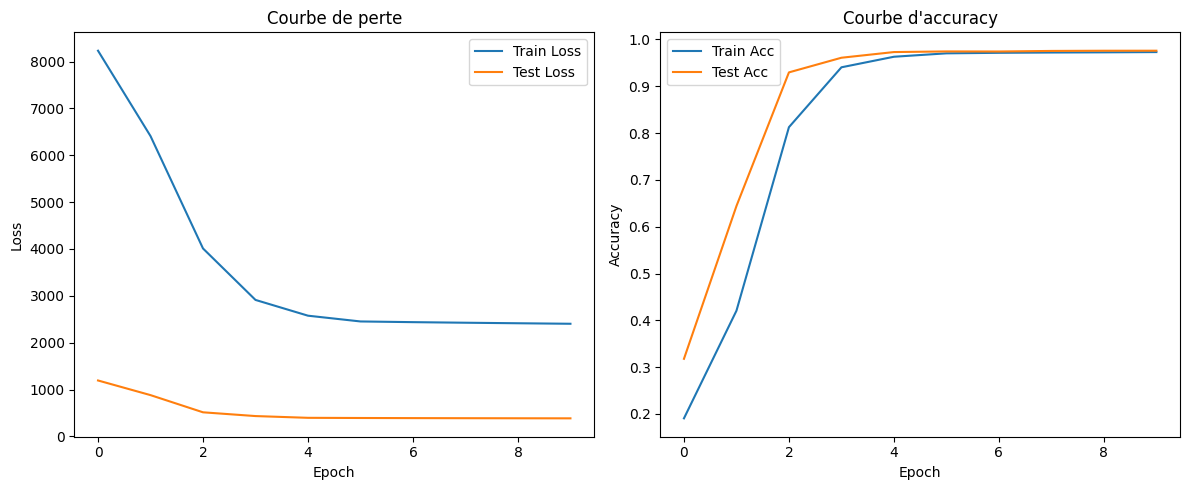

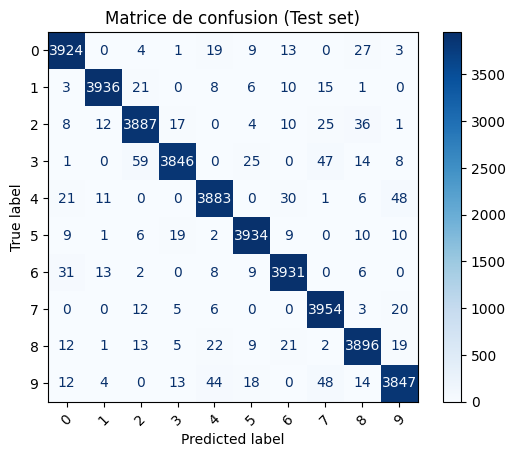

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

# ======== 1. HYPERPARAMÈTRES ========
BATCH_SIZE = 64
EPOCHS = 10
LR = 0.01
EMBED_DIM = 128
NUM_HEADS = 4
NUM_ENCODER_LAYERS = 6
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ======== 2. DATASET EMNIST Digits ========
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = datasets.EMNIST(root="./data", split="digits", train=True, download=True, transform=transform)
test_data  = datasets.EMNIST(root="./data", split="digits", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE)

# ======== 3. MODÈLE CViT ========
class CViT(nn.Module):
    def __init__(self, embed_dim, num_heads, num_classes=10):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.num_patches = 7 * 7
        self.patch_proj = nn.Linear(128, embed_dim)
        self.pos_embed = nn.Parameter(torch.randn(1, self.num_patches, embed_dim))

        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=256, dropout=0.1, activation='gelu')
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=NUM_ENCODER_LAYERS)

        self.mlp_head = nn.Sequential(
            nn.Linear(embed_dim, 128),
            nn.GELU(),
            nn.Dropout(0.25),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)  # (B, 128, 7, 7)
        x = x.flatten(2).transpose(1, 2)  # → (B, 49, 128)
        x = self.patch_proj(x) + self.pos_embed
        x = self.transformer(x)
        x = x.mean(dim=1)  # pooling global
        return self.mlp_head(x)  # Pas de log_softmax ici

# ======== 4. INITIALISATION ========
model = CViT(EMBED_DIM, NUM_HEADS).to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

train_losses, train_accuracies = [], []
test_losses, test_accuracies = [] , []

# ======== 5. ENTRAÎNEMENT ========
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    correct = 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(dim=1) == labels).sum().item()

    acc = correct / len(train_loader.dataset)
    train_losses.append(total_loss)
    train_accuracies.append(acc)
    print(f"[TRAIN] Epoch {epoch+1} | Loss: {total_loss:.2f} | Accuracy: {acc:.4f}")

    # ======== 6. ÉVALUATION ========
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            total_loss += criterion(outputs, labels).item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()
    acc = correct / len(test_loader.dataset)
    test_losses.append(total_loss)
    test_accuracies.append(acc)
    print(f"[TEST] Accuracy: {acc:.4f}")

    # 🔄 Mise à jour du scheduler
    scheduler.step()

# ======== 7. COURBES LOSS / ACCURACY ========
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Courbe de perte")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label="Train Acc")
plt.plot(test_accuracies, label="Test Acc")
plt.title("Courbe d'accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 🔍 Collecter toutes les prédictions et vraies classes
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(DEVICE)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# 📊 Matrice de confusion
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matrice de confusion (Test set)")
plt.show()



In [3]:
print(f"🔢 Nombre d'images dans le train : {len(train_loader.dataset)}")
print(f"🔢 Nombre d'images dans le test  : {len(test_loader.dataset)}")


🔢 Nombre d'images dans le train : 240000
🔢 Nombre d'images dans le test  : 40000


### Utilisation de optuna pour les hyperparams , mais j'ai pas travailler avec ceux qu'il a donne 

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import f1_score
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# ======== DATASET EMNIST Digits ========
def get_loaders(batch_size):
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    dataset = datasets.EMNIST(root="./data", split="digits", train=True, download=True, transform=transform)
    
    # 💡 Optionnel : pour aller plus vite (ne prendre qu'un sous-ensemble)
    # dataset = torch.utils.data.Subset(dataset, range(10000))

    val_size = int(0.1 * len(dataset))
    train_size = len(dataset) - val_size
    train_data, val_data = random_split(dataset, [train_size, val_size])
    
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader

# ======== MODÈLE CViT ========
class CViT(nn.Module):
    def __init__(self, embed_dim, num_heads, num_layers, dropout, num_classes=10):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.num_patches = 7 * 7
        self.patch_proj = nn.Linear(128, embed_dim)
        self.pos_embed = nn.Parameter(torch.randn(1, self.num_patches, embed_dim))

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=256,
            dropout=dropout,
            activation='gelu'
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.mlp_head = nn.Sequential(
            nn.Linear(embed_dim, 128),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)  # (B, 128, 7, 7)
        x = x.flatten(2).transpose(1, 2)  # (B, 49, 128)
        x = self.patch_proj(x) + self.pos_embed
        x = self.transformer(x)
        x = x.mean(dim=1)
        return F.log_softmax(self.mlp_head(x), dim=1)

# ======== OBJECTIVE POUR OPTUNA ========
def objective(trial):
    embed_dim = trial.suggest_categorical("embed_dim", [64, 128, 256])
    num_heads = trial.suggest_categorical("num_heads", [2, 4, 8])
    num_layers = trial.suggest_int("num_layers", 2, 6)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 192])
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3)

    train_loader, val_loader = get_loaders(batch_size)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = CViT(embed_dim, num_heads, num_layers, dropout).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.NLLLoss()

    for epoch in range(3):  # ⚡ Réduction à 3 époques
        model.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            loss = criterion(model(x), y)
            loss.backward()
            optimizer.step()

    # 🎯 Évaluation : macro F1-score
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            preds = model(x).argmax(1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    f1 = f1_score(y_true, y_pred, average="macro")
    return 1.0 - f1  # Optuna minimise, donc on inverse

# ======== LANCEMENT OPTUNA ========
if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20, n_jobs=-1)  # ⚡ Parallélisation

    print("📌 Best trial parameters:")
    for k, v in study.best_trial.params.items():
        print(f"  {k}: {v}")
    print(f"🎯 Best macro F1-score: {1.0 - study.best_trial.value:.4f}")


[I 2025-06-20 17:17:05,574] A new study created in memory with name: no-name-53f231ce-d2ea-46b8-8135-fe16adcd5d9d


d:\M1\AIDC\Projet_Ai\env\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_26448\2054451646.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_sa

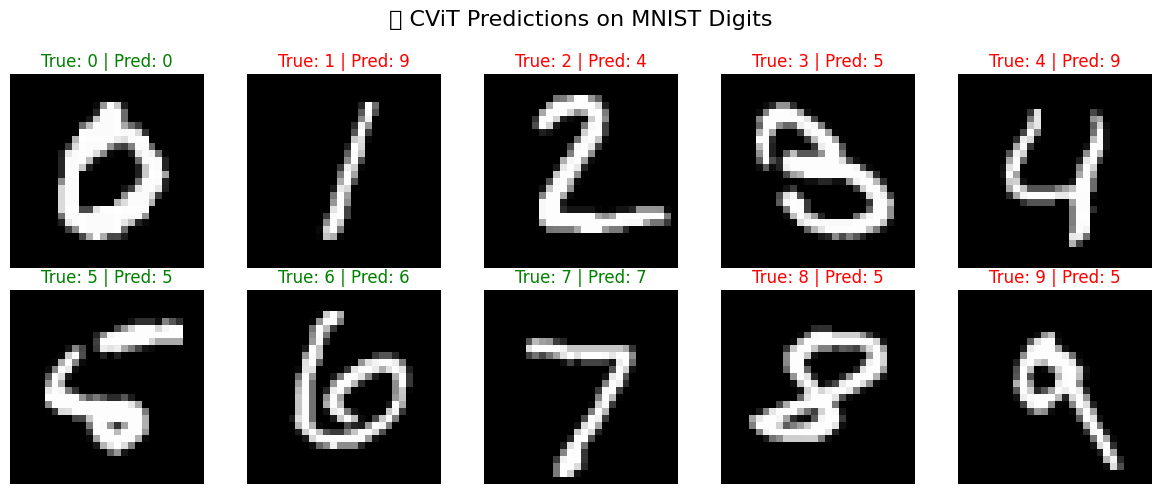

In [2]:
import torch
import torch.nn as nn
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision import transforms

# === Define the CViT model
class CViT(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.flatten = nn.Flatten()
        self.embedding = nn.Linear(128 * 16 * 16, 512)
        encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, dim_feedforward=2048, dropout=0.1)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.classifier = nn.Sequential(
            nn.Linear(512, 128), nn.ReLU(), nn.Dropout(0.25),
            nn.Linear(128, num_classes), nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.flatten(x)
        x = self.embedding(x).unsqueeze(0)
        x = self.transformer(x).squeeze(0)
        return self.classifier(x)

# === Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CViT(num_classes=10).to(device)
model.load_state_dict(torch.load("best_model_cvit.pt", map_location=device))
model.eval()

# === Transform
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# === Predict and display
img_folder = "mnist_digits"
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("📊 CViT Predictions on MNIST Digits", fontsize=16)

for i in range(10):
    img_path = os.path.join(img_folder, f"digit_{i}.png")
    img = Image.open(img_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        pred = output.argmax(1).item()

    # Display image and prediction
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    color = "green" if pred == i else "red"
    ax.set_title(f"True: {i} | Pred: {pred}", color=color)
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
